# Delivery_time -> Predict delivery time using sorting time  

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from scipy.stats import linregress

In [3]:
data=pd.read_csv("C:\\Users\\SARVESH SURVE\\OneDrive\\Desktop\\data\\Excelr.dataset\\delivery_time (1).csv")

In [4]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
corr =data.corr()

<AxesSubplot:>

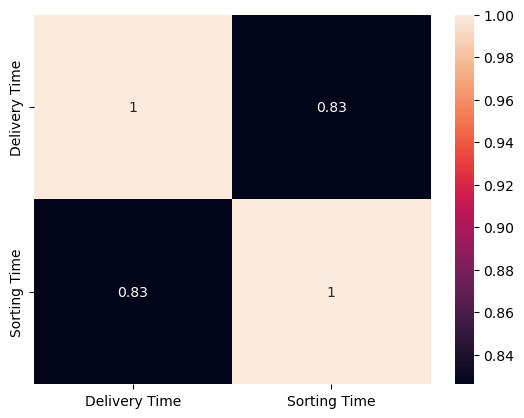

In [9]:
sns.heatmap(corr, annot= True)

In [11]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [12]:
data.skew() , data.kurtosis()

(Delivery Time    0.352390
 Sorting Time     0.047115
 dtype: float64,
 Delivery Time    0.317960
 Sorting Time    -1.148455
 dtype: float64)

In [14]:
data.isnull().sum()


Delivery Time    0
Sorting Time     0
dtype: int64

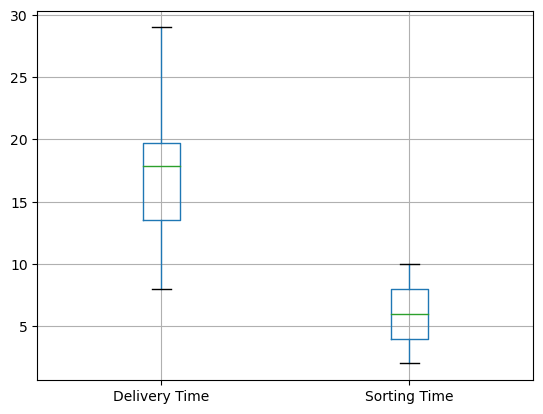

In [15]:
data.boxplot()
plt.show()

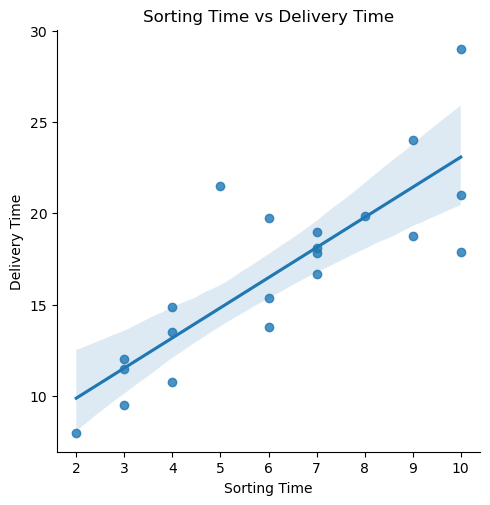

In [16]:
sns.lmplot(x='Sorting Time',y='Delivery Time',data=data)
plt.title("Sorting Time vs Delivery Time")
plt.show()

C:\Users\SARVESH SURVE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


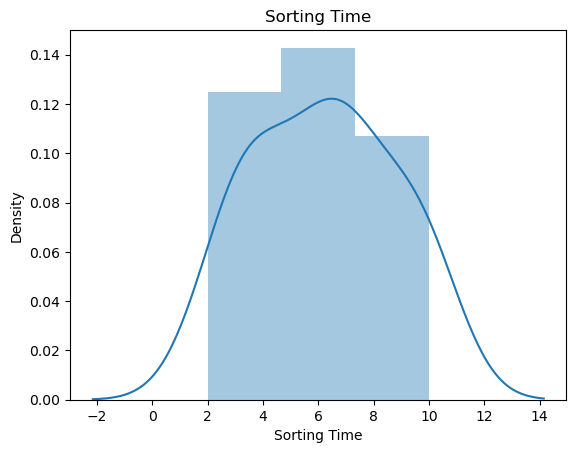

C:\Users\SARVESH SURVE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


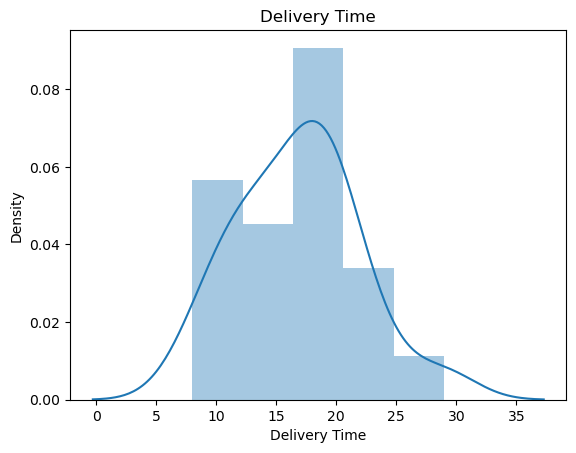

In [18]:
#checking Normality
sns.distplot(a=data['Sorting Time'])
plt.title('Sorting Time')
plt.show()

sns.distplot(a=data['Delivery Time'])
plt.title('Delivery Time')
plt.show()

* From above plots we can say that,
* for Sorting Time most of the data lie within the group 2 - 10
* for Delivery Time most of the data lie within the group 10 - 20

# Model Building and Model Training

In [21]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [19]:
data.columns=['Delivery','Sorting']       
data.head()

,Delivery,Sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [23]:
#fitting model
linear_model=smf.ols("Delivery~Sorting",data=data).fit()

In [24]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        19:46:58   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
Sorting        1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
linear_model.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

In [26]:
print(linear_model.tvalues ,'\n', linear_model.pvalues)

Intercept    3.823349
Sorting      6.387447
dtype: float64 
 Intercept    0.001147
Sorting      0.000004
dtype: float64


In [27]:
(linear_model.rsquared,linear_model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# By Using Log Transformation

In [29]:
data['log_sorting']=np.log(data['Sorting'])

In [31]:
data.head()

,Delivery,Sorting,log_sorting
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585


C:\Users\SARVESH SURVE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


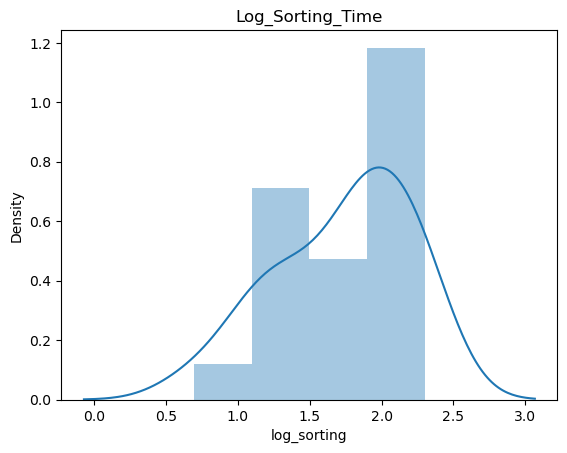

In [32]:
sns.distplot(data['log_sorting'])
plt.title("Log_Sorting_Time")
plt.show()

In [34]:
linear_model_1=smf.ols("Delivery~log_sorting",data=data).fit()

In [35]:
linear_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           2.64e-06
Time:                        19:50:13   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1597      2.455      0.472      0.642      -3.978       6.297
log_sorting     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
linear_model_1.params

Intercept      1.159684
log_sorting    9.043413
dtype: float64

In [37]:
#t-values and p-values
print(linear_model_1.tvalues ,'\n', linear_model_1.pvalues)

Intercept      0.472460
log_sorting    6.586789
dtype: float64 
 Intercept      0.641980
log_sorting    0.000003
dtype: float64


In [38]:
#R squared values
(linear_model_1.rsquared,linear_model_1.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

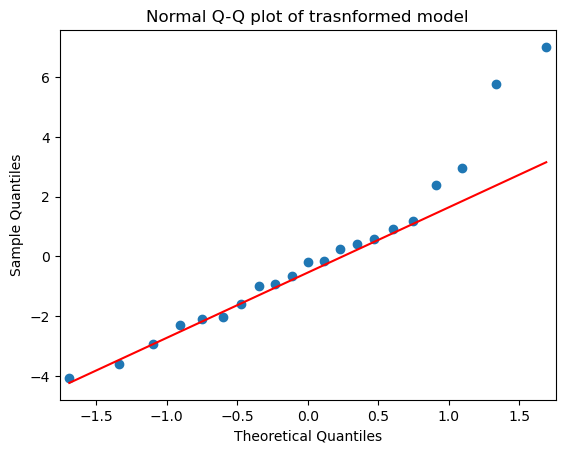

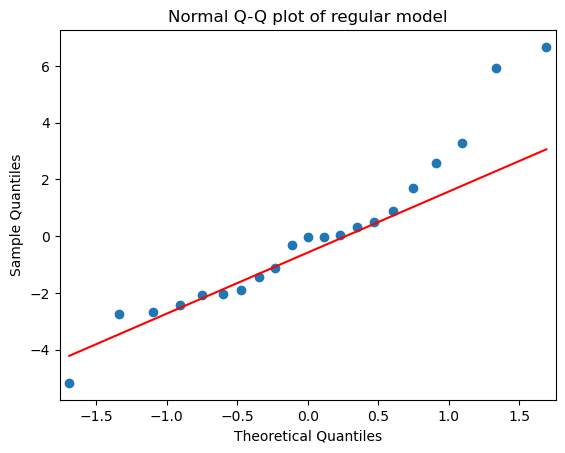

In [39]:
#Normal Q-Q Plot of Residuals for Normality For Transformed Model
sm.qqplot(linear_model_1.resid,line='q')
plt.title('Normal Q-Q plot of trasnformed model')
plt.show()

#Normal Q-Q Plot of Residuals for Normality 
sm.qqplot(linear_model.resid,line='q')
plt.title('Normal Q-Q plot of regular model')
plt.show()

By observing above two plots of transformed model and regular model,

we can say that for transformed model maximum points are lie on straight line,

hence our data follows normality condition.

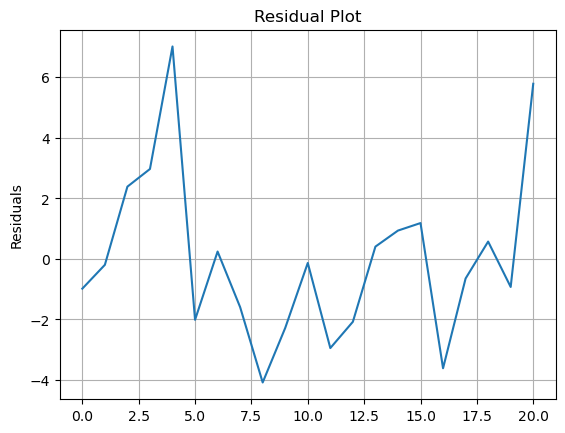

In [40]:
#Residual Plot of transformed  model
plt.plot(linear_model_1.resid)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [41]:
pred_y=linear_model_1.fittedvalues    #predicted values
pred_y.head()

0    21.982913
1    13.696517
2    17.363305
3    21.030094
4    21.982913
dtype: float64

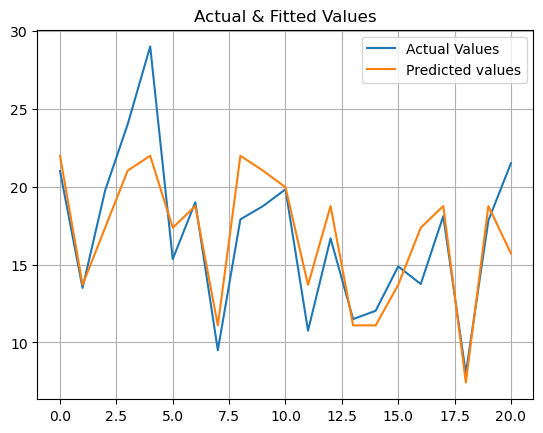

In [43]:
#plot for actual and fitted  values
plt.plot(data["Delivery"],label='Actual Values')
plt.plot(pred_y,label='Predicted values')
plt.title('Actual & Fitted Values')
legend=plt.legend()
plt.grid(True)
plt.show()

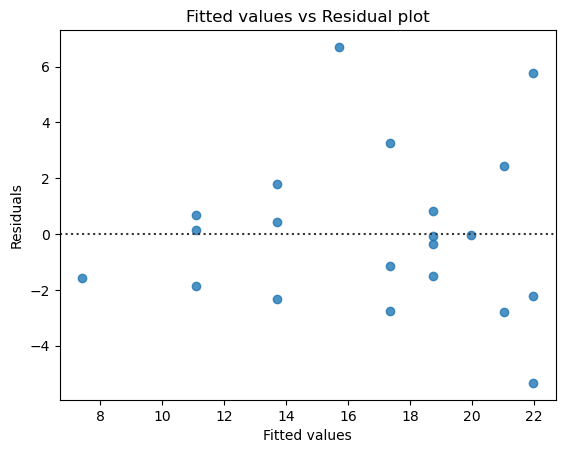

In [44]:
#Residual Vs Fitted Values Plot
sns.residplot(x=pred_y,y=linear_model.resid)
plt.title('Fitted values vs Residual plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

This plot looks good in that the variance is roughly the same all the way across and there are no worrisome patterns.there seems to be no difficulties with the model.



# Q.2) Salary_hike -> Build a prediction model for Salary_hike

In [48]:
data=pd.read_csv("C:\\Users\\SARVESH SURVE\\OneDrive\\Desktop\\data\\Salary_Data.csv")

In [49]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [51]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [52]:
data.shape

(30, 2)

In [53]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [54]:
cor = data.corr() 
cor        

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

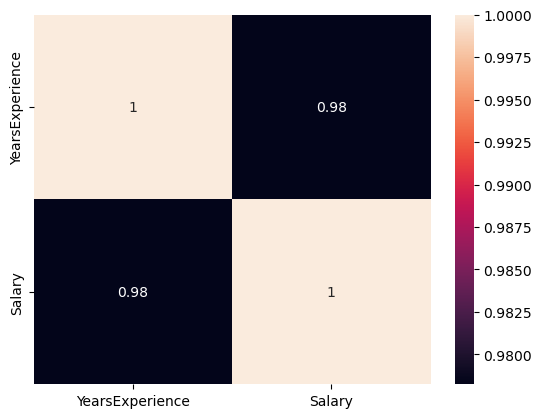

In [55]:
sns.heatmap(cor,annot=True)

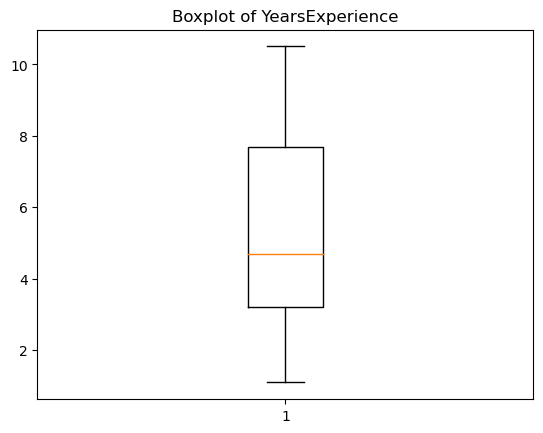

In [57]:
#boxplot
plt.boxplot(x='YearsExperience',data=data)
plt.title("Boxplot of YearsExperience")
plt.show()

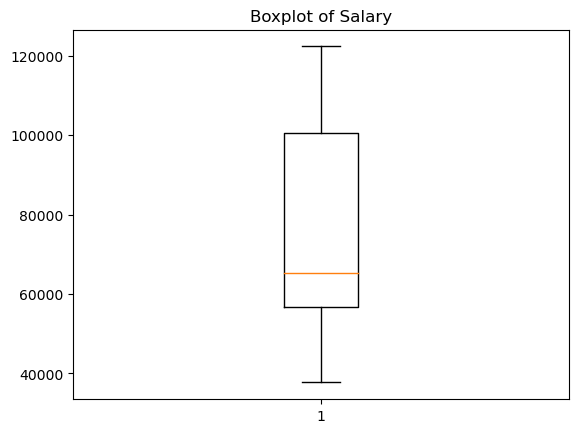

In [58]:
plt.boxplot(x='Salary',data=data)
plt.title("Boxplot of Salary")
plt.show()

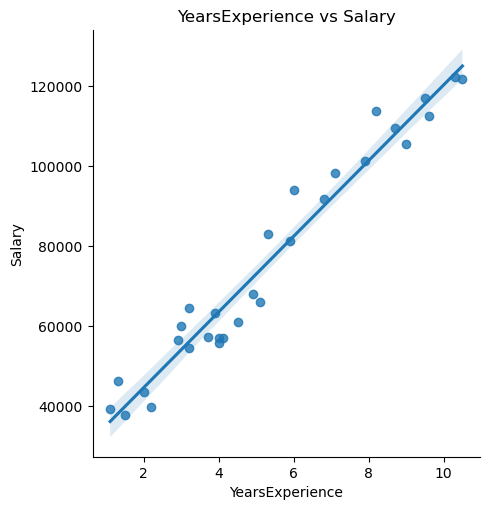

In [59]:
#linearity
sns.lmplot(x='YearsExperience',y='Salary',data=data)
plt.title('YearsExperience vs Salary')
plt.show()

C:\Users\SARVESH SURVE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


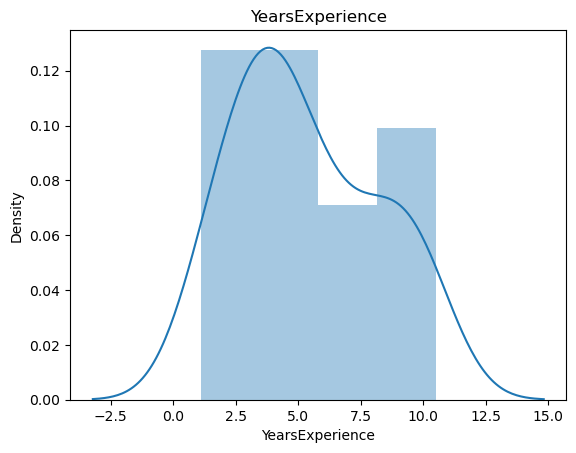

In [61]:
#Normality
sns.distplot(data['YearsExperience'])
plt.title('YearsExperience')
plt.show()


C:\Users\SARVESH SURVE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


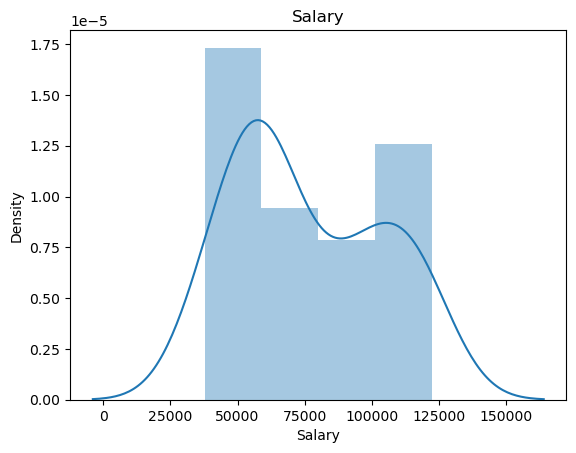

In [63]:
 sns.distplot(data['Salary'])
plt.title('Salary')
plt.show()

# Model Building and Model Training

In [65]:
data=data.rename(columns={"YearsExperience":"X",'Salary':'y'})
data.head()

,X,y
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [67]:
model = smf.ols('y~X',data=data).fit()

In [68]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        20:03:35   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
X           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
#parameters
model.params

Intercept    25792.200199
X             9449.962321
dtype: float64

In [71]:
#t-values and p-values
print(model.tvalues ,'\n', model.pvalues)

Intercept    11.346940
X            24.950094
dtype: float64 
 Intercept    5.511950e-12
X            1.143068e-20
dtype: float64


In [72]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

since our r-square value is 0.956

hence, higher r-squared indicates a better fit for the model.

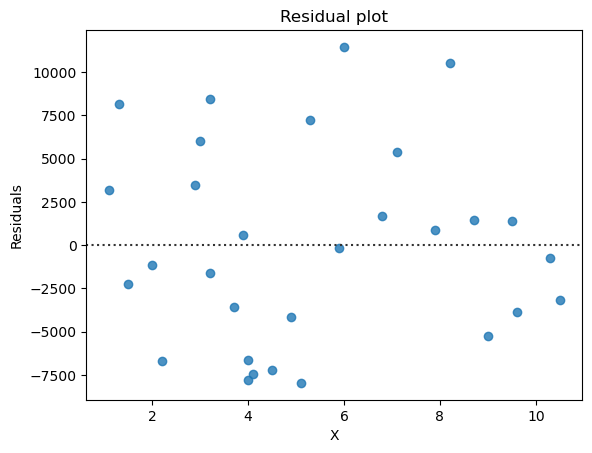

In [73]:
#Residual Plot
sns.residplot(x=data['X'],y=model.resid)
plt.title('Residual plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.show()

By observing the above Residual Plot, we can say that the residual plot has random pattern, that indicating a good fit for a linear model.

Now we see that what r-square value and residual plot show us for transformed equation

# By Using Different Transformations

#  Log Tranformation

In [75]:
data.head()

,X,y
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [76]:
data['log_x'] = np.log(data['X'])

In [77]:
data.head()

,X,y,log_x
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457


C:\Users\SARVESH SURVE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


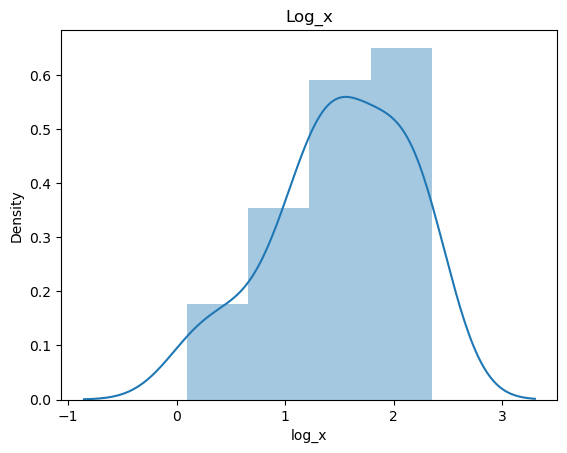

In [79]:
sns.distplot(data['log_x'])
plt.title("Log_x")
plt.show()

# Model Building and Model Training

In [81]:
model_1 = smf.ols('y~log_x',data=data).fit()

In [82]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           3.25e-13
Time:                        20:10:27   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_x       4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
model_1.rsquared

0.8538888828756969

This r-square value is less than the r-square of the model from raw data.

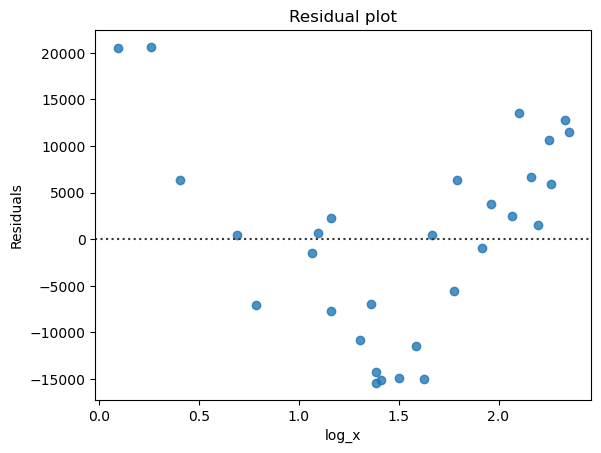

In [85]:
#Residual  Plot
sns.residplot(x=data['log_x'],y=model_1.resid)
plt.title('Residual plot')
plt.xlabel('log_x')
plt.ylabel('Residuals')
plt.show()

# Quadratic model (SQRT Transformation)

In [86]:
data['sqrt_x'] = np.sqrt(data['X'])

In [87]:
data.head()

,X,y,log_x,sqrt_x
0,1.1,39343.0,0.095310,1.048809
1,1.3,46205.0,0.262364,1.140175
2,1.5,37731.0,0.405465,1.224745
3,2.0,43525.0,0.693147,1.414214
4,2.2,39891.0,0.788457,1.483240


C:\Users\SARVESH SURVE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


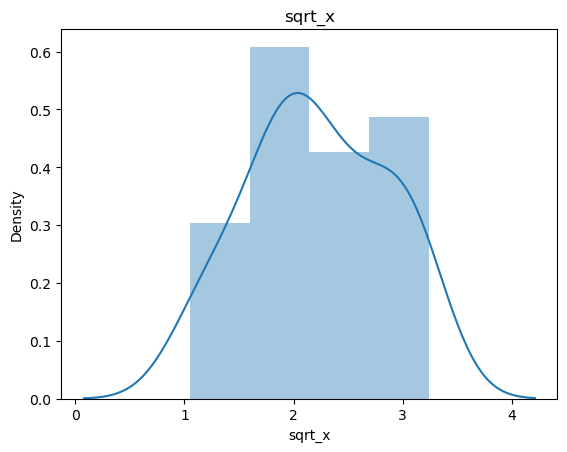

In [89]:
sns.distplot(data['sqrt_x'])
plt.title("sqrt_x")
plt.show()

# Model Building and Model Training

In [91]:
model_2 = smf.ols('y~sqrt_x',data=data).fit()

In [92]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           8.57e-18
Time:                        20:13:47   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
sqrt_x       4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
model_2.rsquared

0.9310009544993526

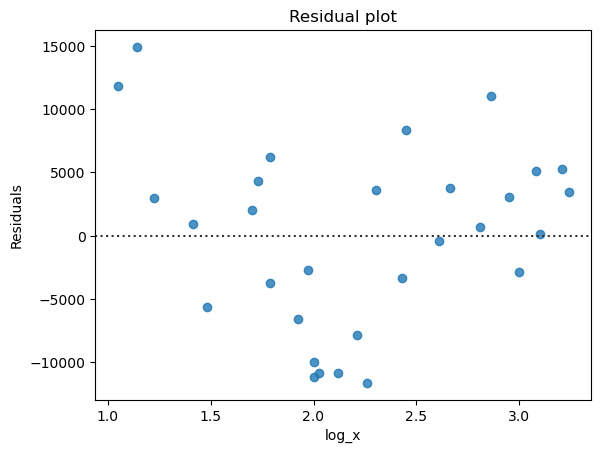

In [95]:
#Residual Plot
sns.residplot(x=data['sqrt_x'],y=model_2.resid)
plt.title('Residual plot')
plt.xlabel('log_x')
plt.ylabel('Residuals')
plt.show()

The above residual plot show U-shape,which indicates our residual are Non-random.

# Reciprocal model (1/y) Transformation

In [96]:
data['res_proc_y']  = 1/data['y']

In [97]:
data.head()

,X,y,log_x,sqrt_x,res_proc_y
0,1.1,39343.0,0.095310,1.048809,0.000025
1,1.3,46205.0,0.262364,1.140175,0.000022
2,1.5,37731.0,0.405465,1.224745,0.000027
3,2.0,43525.0,0.693147,1.414214,0.000023
4,2.2,39891.0,0.788457,1.483240,0.000025


C:\Users\SARVESH SURVE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


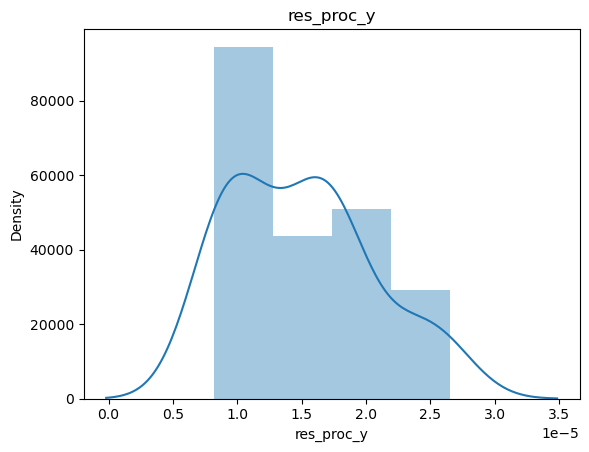

In [98]:
sns.distplot(data['res_proc_y'])
plt.title("res_proc_y")
plt.show()

# Model Building and Model Training

In [100]:
model_3 = smf.ols('res_proc_y~X',data=data).fit()

In [101]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             res_proc_y   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     173.2
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           1.63e-13
Time:                        20:18:28   Log-Likelihood:                 350.83
No. Observations:                  30   AIC:                            -697.7
Df Residuals:                      28   BIC:                            -694.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.454e-05    8.2e-07     29.913      0.000    2.29e-05    2.62e-05
X          -1.799e-06   1.37e-07    -13.162      0.000   -2.08e-06   -1.52e-06
==============================================================================
Omnibus:                        1.760   Durbin-Watson:                   1.137
Prob(Omnibus):                  0.415   Jarque-Bera (JB):                1.380
Skew:                           0.516   Prob(JB):                        0.502
Kurtosis:                       2.802   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
model_3.rsquared

0.8608672473082564

This r-square value is also less than the r-square of the model from raw data.

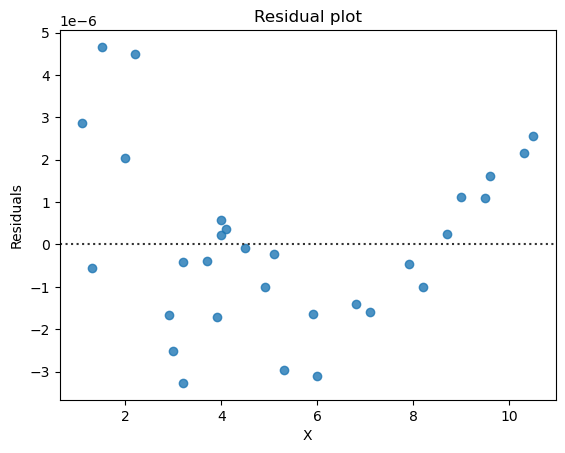

In [103]:
#Residual Plot
sns.residplot(x=data['X'],y=model_3.resid)
plt.title('Residual plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.show()

The above residual plot shows little bit U-shape,which indicates our residual are Non-random.

Model Selection
Now by comparing r-square of all models,

we can say that the models which are fitted by using transformation

are not so good as compare to our model from raw data(original data)

Hence , we select our first model for further calculation

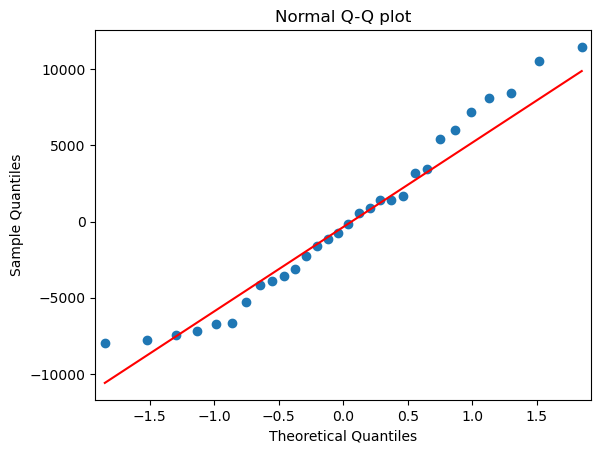

In [104]:
#Normal Q-Q Plot
sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot')
plt.show()


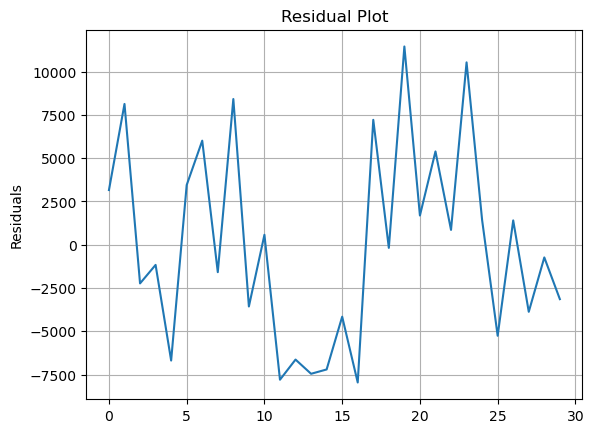

In [105]:
#Residual Plot
plt.plot(model.resid)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [107]:
#for prediction
test_data=data['X']

In [108]:
predict_y = model.predict(test_data)
print(predict_y.head())

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64


In [110]:
actual = data['y']
actual.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: y, dtype: float64

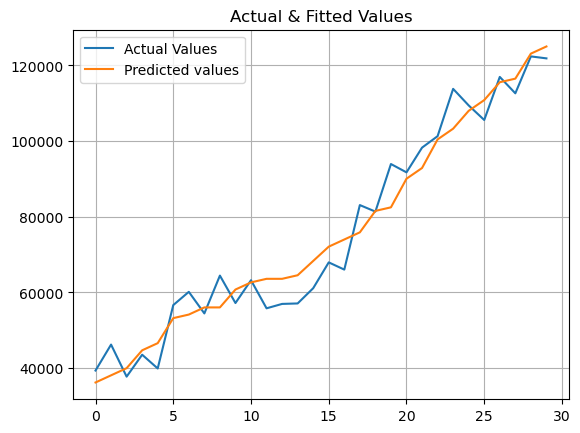

In [111]:
#plot for actual and fitted  values
plt.plot(actual,label='Actual Values')
plt.plot(predict_y,label='Predicted values')
plt.title('Actual & Fitted Values')
legend=plt.legend()
plt.grid(True)
plt.show()

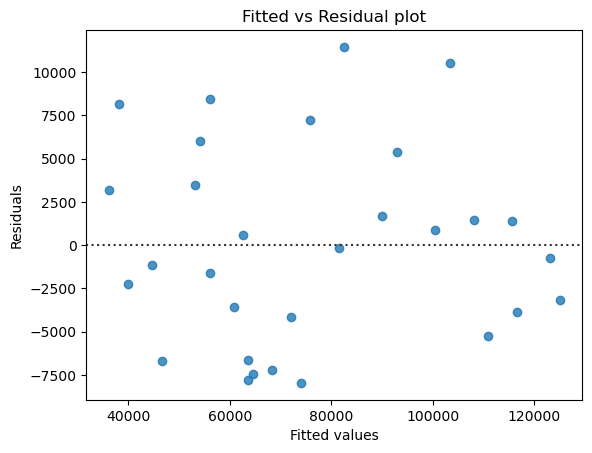

In [112]:
#Residual Vs Fitted Values Plot
sns.residplot(x=predict_y,y=model.resid)
plt.title('Fitted vs Residual plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

This plot looks good in that the variance is roughly the same all the way across and there are no worrisome patterns.there seems to be no difficulties with the model.